<a href="https://colab.research.google.com/github/MarwaFA21/Regression-Analysis-with-Data-Sql/blob/main/Tugas_Individu_2_Data_sql_Marwa_FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Analysis

https://www.kaggle.com/datasets/kaggle/sf-salaries/data

Akan dicari model regresi terbaiknya dengan melihat nilai koefisien determinasi terbesarnya.

#Import Library

In [ ]:
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import Database
database = "/content/drive/MyDrive/database/database.sqlite"
conn = sqlite3.connect(database)

#melihat tabel yang ada di database
data = pd.read_sql('select * from sqlite_master where type="table"',conn)
data

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...


In [ ]:
#memanggil data yang ada di tabel Salaries pada database
Salaries = pd.read_sql('select * from Salaries',conn)
Salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,


#Data Understanding

In [ ]:
#melihat informasi tipe data
Salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  object 
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


**Interpretasi**

---
Dari hasil output di atas, dapat dilihat bahwa tipe data adalah numerical yang berarti bahwa datanya berupa data kuantitatif yang nilainya berupa angka dengan tipe data yang digunakan, yaitu tipe data integer dan float serta data kualitatif berupa object. Tipe data integer adalah tipe data yang menyatakan bilangan bulat dan untuk tipe data float adalah tipe data yang menyatakan bilangan yang memiliki koma(desimal). Variabel yang bertipe data integer adalah variabel Id dan Year. Sedangkan, untuk variabel yang bertipe data float adalah TotalPay dan TotalPayBenefits. Variabel yang bertipe object antara lain EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, Notes, Agency dan Status.

In [ ]:
#melihat informasi statistika deskriptif
Salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,74768.321972,93692.554811,2012.522643
std,42912.857795,50517.005274,62793.533483,1.117538
min,1.000000,-618.130000,-618.130000,2011.000000
25%,37164.250000,36168.995000,44065.650000,2012.000000
50%,74327.500000,71426.610000,92404.090000,2013.000000
75%,111490.750000,105839.135000,132876.450000,2014.000000
max,148654.000000,567595.430000,567595.430000,2014.000000


**Interpretasi**

---
Dari output di atas kita dapat melihat jumlah data, nilai mean, nilai standar deviasi, nilai maksimal, nilai minimal, nilai quantile 1, quantile 2 dan quntile 3.

#Data Pre-Processing

In [ ]:
#karena atribut id dan employee name hal yang unik untuk semua orang dan tidak akan membawa bobot apapun pada model, jadi bisa dilakukan dropping
Salaries.drop(['Id', 'EmployeeName'], axis = 1, inplace = True)

In [ ]:
Salaries.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,


In [ ]:
#melihat missing values
Salaries.isnull().sum()

JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

**Interpretasi**

---

Setelah dilakukan pengecekan, terlihat bahwa dataset yang tersedia tidak terdeteksi adanya missing value pada setiap kolomnya.

In [ ]:
#karena atribut notes tidak memberikan informasi apapun, maka bisa dilakukan dropping
Salaries.drop(['Notes'], inplace = True, axis = 1)
Salaries.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,San Francisco,
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,San Francisco,
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,San Francisco,
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,San Francisco,
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,San Francisco,


In [ ]:
#karena atribut status berpengaruh pada model, maka bisa dilakukan dropping
Salaries.drop(['Status'], inplace = True, axis = 1)
Salaries.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,San Francisco
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,San Francisco
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,San Francisco
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,San Francisco
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,San Francisco


In [ ]:
#atribut agency tidak memiliki bobot karena semua nilainya sama, jadi bisa dilakukan dropping
Salaries.drop(['Agency'], inplace = True, axis = 1)
Salaries.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011


In [ ]:
Salaries['BasePay']

0            167411.18
1            155966.02
2            212739.13
3                77916
4             134401.6
              ...     
148649               0
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653               0
Name: BasePay, Length: 148654, dtype: object

In [ ]:
#menghapus beberapa baris yang tidak memiliki informasi
Salaries = Salaries[Salaries['BasePay'] != 'Not Provided']
Salaries.shape

(148650, 8)

In [ ]:
#menghapus beberapa baris yang tidak memiliki informasi
Salaries = Salaries[Salaries['OvertimePay'] != 'Not Provided']
Salaries.shape

(148650, 8)

In [ ]:
#menghapus beberapa baris yang tidak memiliki informasi
Salaries = Salaries[Salaries['OtherPay'] != 'Not Provided']
Salaries.shape

(148650, 8)

In [ ]:
#pengkodean kolom kategori - pengkodean label
#jobtitle
Salaries['JobTitle'].value_counts()

Transit Operator                        7036
Special Nurse                           4389
Registered Nurse                        3736
Public Svc Aide-Public Works            2518
Police Officer 3                        2421
                                        ... 
BUILDING SERVICES TECHNICIAN               1
TRIAL DELAY REDUCTION COORDINATOR          1
POWERHOUSE ELECTRICIAN SUPERVISOR II       1
CHIEF NURSERY SPECIALIST                   1
Cashier 3                                  1
Name: JobTitle, Length: 2158, dtype: int64

In [ ]:
Salaries['JobTitle'] = Salaries['JobTitle'].astype('category').cat.codes
Salaries.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,831,167411.18,0,400184.25,,567595.43,567595.43,2011
1,293,155966.02,245131.88,137811.38,,538909.28,538909.28,2011
2,293,212739.13,106088.18,16452.6,,335279.91,335279.91,2011
3,2124,77916,56120.71,198306.9,,332343.61,332343.61,2011
4,576,134401.6,9737,182234.59,,326373.19,326373.19,2011


In [ ]:
#melihat type data
Salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          148650 non-null  int16  
 1   BasePay           148650 non-null  object 
 2   OvertimePay       148650 non-null  object 
 3   OtherPay          148650 non-null  object 
 4   Benefits          148650 non-null  object 
 5   TotalPay          148650 non-null  float64
 6   TotalPayBenefits  148650 non-null  float64
 7   Year              148650 non-null  int64  
dtypes: float64(2), int16(1), int64(1), object(4)
memory usage: 9.4+ MB


In [ ]:
#mengconvert tipe data karena atribut basepay, overtimepay, otherpaytime, benefits masih bertipe object
Salaries['BasePay'] = pd.to_numeric(Salaries['BasePay'], errors = 'coerce', downcast = 'float')
Salaries['OvertimePay'] = pd.to_numeric(Salaries['OvertimePay'], errors = 'coerce', downcast = 'float')
Salaries['OtherPay'] = pd.to_numeric(Salaries['OtherPay'], errors = 'coerce', downcast = 'float')
Salaries['Benefits'] = pd.to_numeric(Salaries['Benefits'], errors = 'coerce', downcast = 'float')
Salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          148650 non-null  int16  
 1   BasePay           148045 non-null  float64
 2   OvertimePay       148650 non-null  float64
 3   OtherPay          148650 non-null  float64
 4   Benefits          112491 non-null  float64
 5   TotalPay          148650 non-null  float64
 6   TotalPayBenefits  148650 non-null  float64
 7   Year              148650 non-null  int64  
dtypes: float64(6), int16(1), int64(1)
memory usage: 9.4 MB


**Interpretasi**

---
Output di atas menjelaskan informasi atribut pada data salaries yang sudah melewati tahap pre-procesing.

In [ ]:
#Seleksi atribut
Salaries['Response'] = Salaries['OvertimePay'] + Salaries['OtherPay']
Salaries['Regressor'] = Salaries['BasePay']

In [ ]:
#melihat missing values
Salaries.isnull().sum()

Year           0
Response       0
Regressor    605
dtype: int64

In [ ]:
#menginput missing value
Salaries['Regressor'] = Salaries['Regressor'].fillna(Salaries['Regressor'].mean())

In [ ]:
#menghilangkan kolom yang tidak diperlukan
Salaries.drop(['JobTitle','TotalPay','TotalPayBenefits'],axis=1,inplace=True)
Salaries.drop(['BasePay','OvertimePay','OtherPay','Benefits'],axis=1,inplace=True)

In [ ]:
#menguji data tahun 2014
test = Salaries[Salaries['Year']==2014]
Salaries = Salaries[Salaries['Year'] != 2014]

In [ ]:
test.shape

(38119, 3)

In [ ]:
#final data training setelah pre-processing
Salaries.head()

,Year,Response,Regressor
0,2011,400184.25,167411.18
1,2011,382943.26,155966.02
2,2011,122540.78,212739.13
3,2011,254427.61,77916.00
4,2011,191971.59,134401.60


In [ ]:
#final data testing setelah pre-processing
test.head()

,Year,Response,Regressor
110531,2014,342802.63,129150.01
110532,2014,71276.49,318835.49
110533,2014,82313.70,257340.00
110534,2014,19266.72,307450.04
110535,2014,24165.44,302068.00


#Exploratory Data Analysis

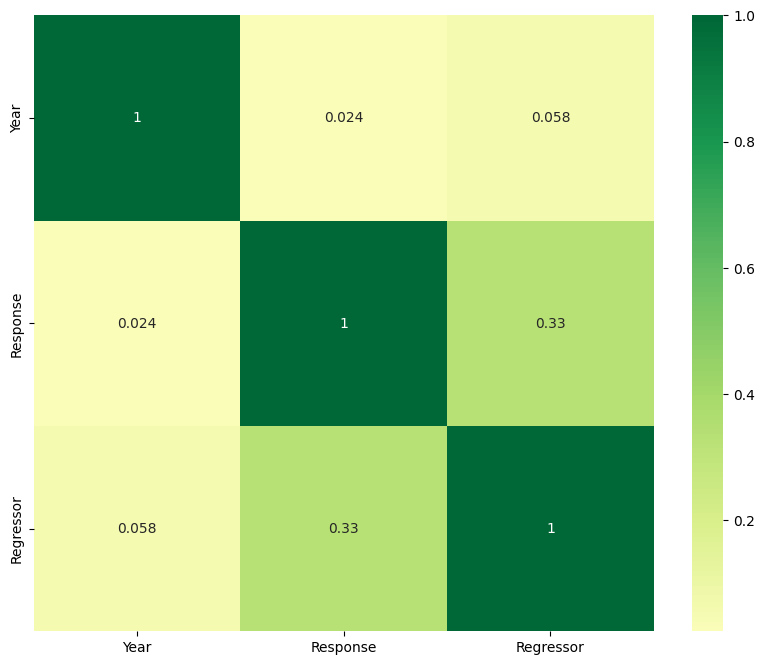

In [ ]:
#mengetahui korelasi antar atribut/variabel bebas melalui heatmap
plt.figure(figsize = (10,8))
p=sns.heatmap(Salaries.corr(), annot=True, cmap='RdYlGn', center=0)

**Interpretasi**

---

Nilai korelasi yang dihasilkan diantaranya 0,024; 0,058 dan 0,33. Nilai korelasi 0,024 dan 0,058 mengartikan bahwa hubungan lemah atau hampir tidak ada hubungan linear yang signifikan antar dua variabel tersebut. Hal ini dikarenakan kedua nilai korelasi tersebut merupakan nilai korelasi antar variabel regressor/bebas, yang mana sebelum pemodelan menggunakan analisis regresi harus memenuhi uji asumsi non multikolinearitas atau tidak ada pengaruh antar variabel bebas. Sedangkan nilai korelasi 0,33 atau setara dengan 33% mengartikan bahwa nilai tersebut menunjukkan adanya hubungan positif antara dua variabel, yaitu antar variabel regressor dengan respons. Yang berarti bahwa ketika nilai satu variabel meningkat, nilai variabel lainnya juga cenderung meningkat. Pada kasus ini, nilai korelasi 0,33 dihasilkan oleh korelasi antara regressor dengan respon.

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Response'}>],
       [<Axes: title={'center': 'Regressor'}>, <Axes: >]], dtype=object)

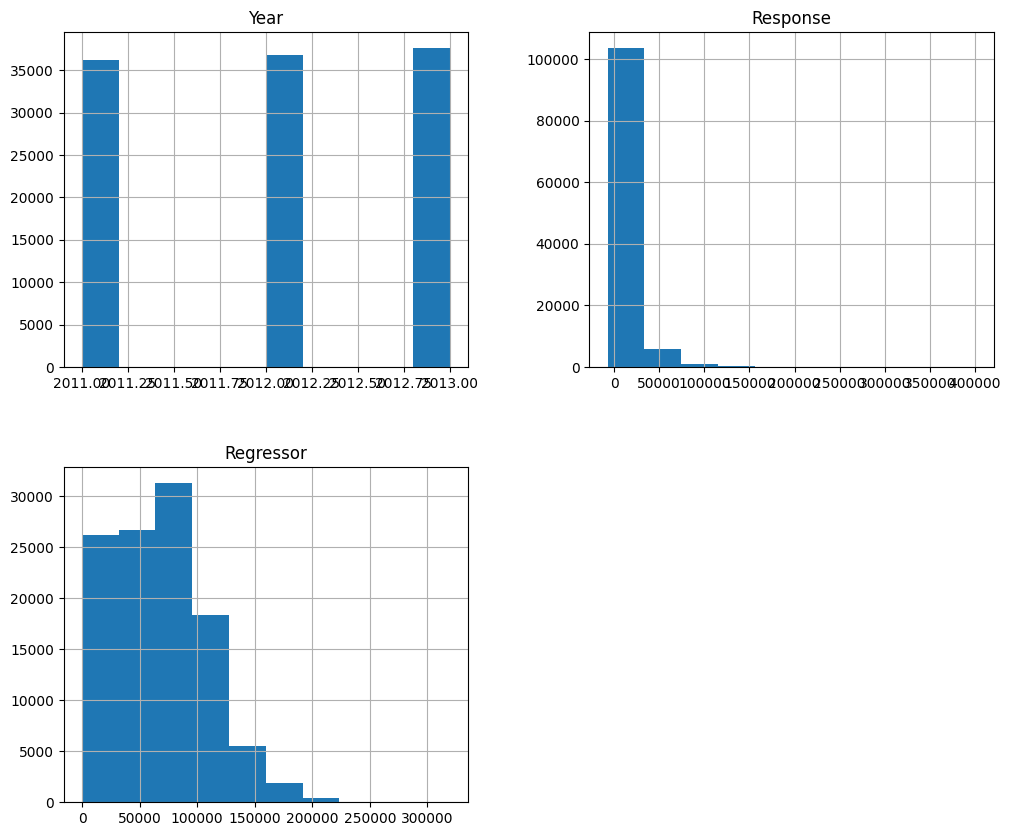

In [ ]:
#membuat histogram
Salaries.hist(figsize=(12,10))

Text(0, 0.5, 'Base Pay')

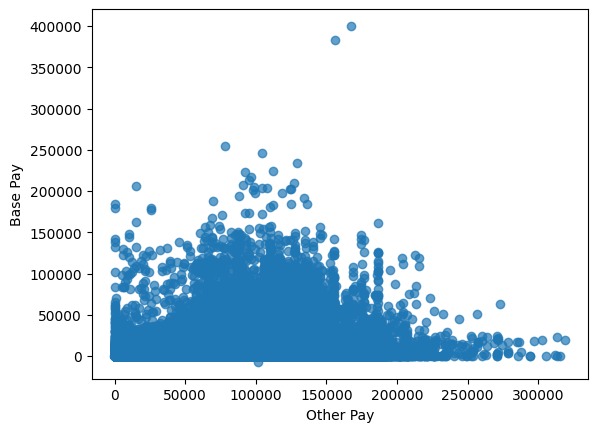

In [ ]:
#membuat scatter plot
plt.scatter(Salaries['Regressor'], Salaries['Response'], alpha=0.7)
plt.xlabel('Other Pay')
plt.ylabel('Base Pay')

**Interpretasi**


---
Berdasarkan output scatter plot di atas, dapat disimpulkan bahwa antara variabel life_expec dan income memiliki hubungan yang kuat. Hal ini dikarenakan bentuk scatter plot kedua variabel tersebut tidak berpola.

#Model Building

In [ ]:
#spliting data menjadi data training dan testing dengan proporsi 80:20
#data training adalah data yang digunakan untuk pelatihan machine learning, sedangkan data testing adalah data yang digunakan untuk mengukur seberapa bagus performansi model yang digunakan
x_train, x_test, y_train, y_test = train_test_split(Salaries[['Regressor']], Salaries[['Response']], test_size=0.2)
x_train, x_test, y_train, y_test

(        Regressor
 71209     2734.08
 5339    104759.72
 24344    48190.20
 22682    48472.45
 45206   103077.10
 ...           ...
 97682    55045.04
 28734    19001.76
 88510    80133.01
 110057     630.00
 8200    101268.30
 
 [88424 rows x 1 columns],
         Regressor
 28822    21200.00
 11525    90838.63
 110300     311.23
 85557    67473.66
 52924    74529.02
 ...           ...
 77689   125290.20
 96305    58553.28
 17500    65068.98
 54456    69332.99
 75954   102242.98
 
 [22107 rows x 1 columns],
         Response
 71209       0.00
 5339    17686.42
 24344    2966.33
 22682    7111.34
 45206       0.00
 ...          ...
 97682     605.38
 28734    5343.12
 88510    2081.17
 110057      0.00
 8200     5064.12
 
 [88424 rows x 1 columns],
         Response
 28822    2476.00
 11525       0.00
 110300      6.76
 85557   32868.63
 52924       0.00
 ...          ...
 77689   15321.47
 96305    1627.77
 17500    4783.87
 54456       0.00
 75954   54781.32
 
 [22107 rows x 1 column

#1. Analisis regresi linear sederhana

In [ ]:
#initializing data
model = LinearRegression()

# fitting data
model.fit(x_train, y_train)

#prediksi
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

#r2
train_R2_LR = r2_score(y_train, pred_train)
test_R2_LR = r2_score(y_test, pred_test)

print('train R2 SCORE:', train_R2_LR)
print('test R2 SCORE:', test_R2_LR)

train R2 SCORE: 0.11307604834190643
test R2 SCORE: 0.10382455117897194


Text(0.5, 1.0, 'Regression analysis of Basepay vs Other Pays')

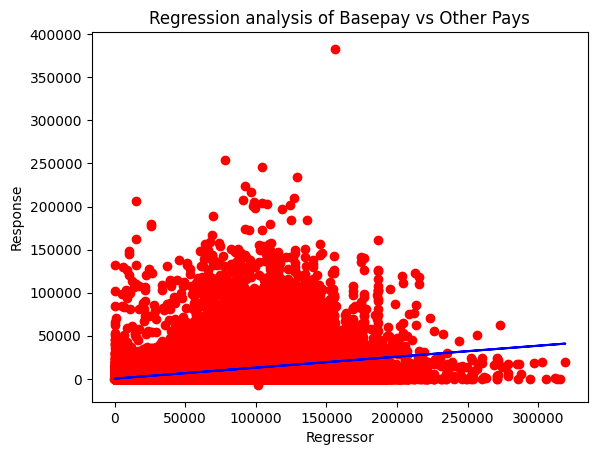

In [ ]:
#melihat model dengan data
#plot data training
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, pred_train, color = "blue")
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("Regression analysis of Basepay vs Other Pays")

Text(0.5, 1.0, 'Linear model')

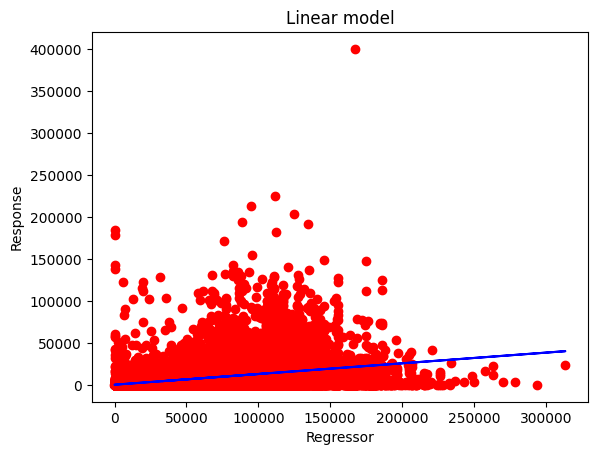

In [ ]:
#memvalidasi data berbentuk plot
plt.scatter(x_test, y_test, color = "red") #data aktual
plt.plot(x_test, pred_test, color = "blue") #modelnya
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("Linear model")

#2. Analisis regresi non-linear sederhana dengan derajat 2

In [ ]:
#mengubah data ke bentuk polinomial derajat 2
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train) #membentuk data training agar menghasilkan fitur polinomial

poly_reg.fit(x_poly, y_train)

# fitting our data into model
model = LinearRegression()
model.fit(x_poly, y_train)

#predictions
pred_train = model.predict(x_poly)
x_poly_test = poly_reg.fit_transform(x_test)
pred_test = model.predict(x_poly_test)

# r2
train_R2_PR2 = r2_score(y_train, pred_train)
test_R2_PR2 = r2_score(y_test, pred_test)

print('train R2:',train_R2_PR2)
print('test R2:',test_R2_PR2)

train R2: 0.11876053450293134
test R2: 0.10867602301404511


Text(0.5, 1.0, 'Regression analysis of Basepay vs Other Pays')

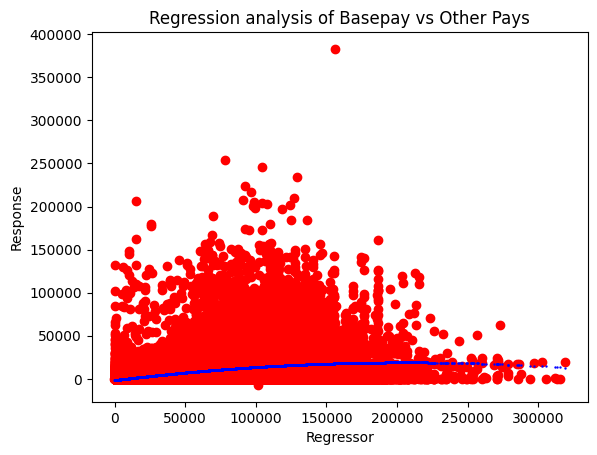

In [ ]:
#melihat model dengan data
#plot data training
plt.scatter(x_train, y_train, color = "red")
plt.scatter(x_train, pred_train, color = "blue", s=0.5)
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("Regression analysis of Basepay vs Other Pays")

Text(0.5, 1.0, 'quadratic model - degree = 2')

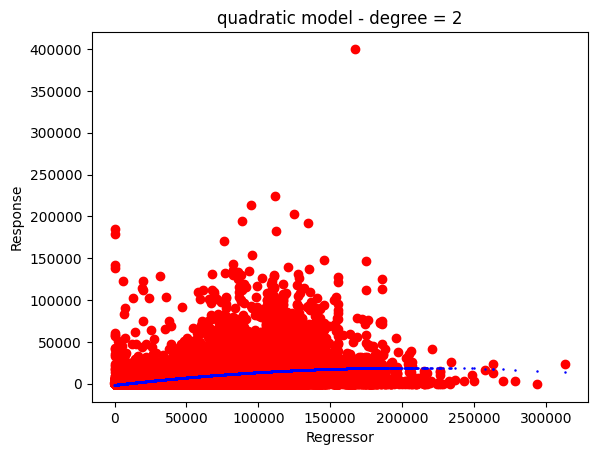

In [ ]:
#memvalidasi data berbentuk plot
plt.scatter(x_test, y_test, color = "red")
plt.scatter(x_test, pred_test, color = "blue", s=0.6)
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("quadratic model - degree = 2")

#3. Analisis regresi non-linear sederhana derajat 3

In [ ]:
#mengubah data ke bentuk polinomial derajat 3
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train)

poly_reg.fit(x_poly, y_train)

# fitting our data into model
model = LinearRegression()
model.fit(x_poly, y_train)

#predictions
pred_train = model.predict(x_poly)
x_poly_test = poly_reg.fit_transform(x_test)
pred_test = model.predict(x_poly_test)

# r2
train_R2_PR3 = r2_score(y_train, pred_train)
test_R2_PR3 = r2_score(y_test, pred_test)

print('train R2:',train_R2_PR3)
print('test R2:',test_R2_PR3)

train R2: 0.12580866809711444
test R2: 0.11788554962130149


Text(0.5, 1.0, 'Regression analysis of Basepay vs Other Pays')

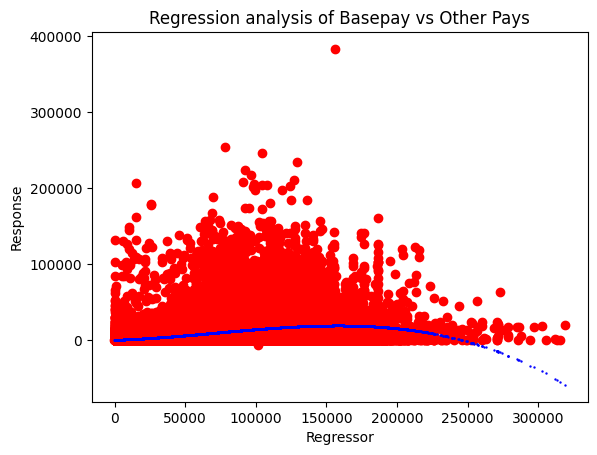

In [ ]:
#melihat model dengan data
#plot data training
plt.scatter(x_train, y_train, color = "red")
plt.scatter(x_train, pred_train, color = "blue", s = 0.5)
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("Regression analysis of Basepay vs Other Pays")

Text(0.5, 1.0, 'cubic - degree = 3')

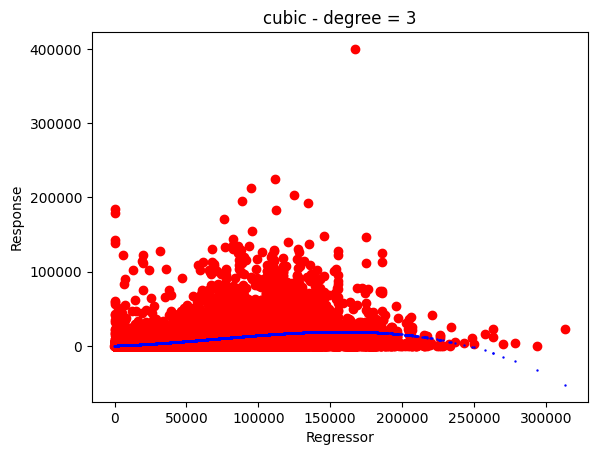

In [ ]:
#memvalidasi data berbentuk plot
plt.scatter(x_test, y_test, color = "red")
plt.scatter(x_test, pred_test, color = "blue", s = 0.5)
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("cubic - degree = 3")

**Interpretasi**

---
Model sempurna diperoleh ketika nilai R2 besar. Terlihat R2 dari model linier, polinomial dengan derajat 2 dan 3 yang memberikan hasil terbaik adalah polinomial dengan derajat = 3.

In [ ]:
#mendefinisikan skor kesalahan dan k-value
train_R2 = []
test_R2 = []
degree = []

# k dari 1 sampai 10
for k in range(1, 10):
    # storing degree
    degree.append(k)

    # initialising model
    poly_reg = PolynomialFeatures(degree=k)
    x_poly = poly_reg.fit_transform(x_train)

    # fitting data
    model = LinearRegression()
    model.fit(x_poly,y_train)

     #predictions
    pred_train = model.predict(x_poly)
    x_poly_test = poly_reg.fit_transform(x_test)
    pred_test = model.predict(x_poly_test)

    # training data R2
    train_R2.append(r2_score(y_train, pred_train))

    #test data R2
    test_R2.append(r2_score(y_test, pred_test))

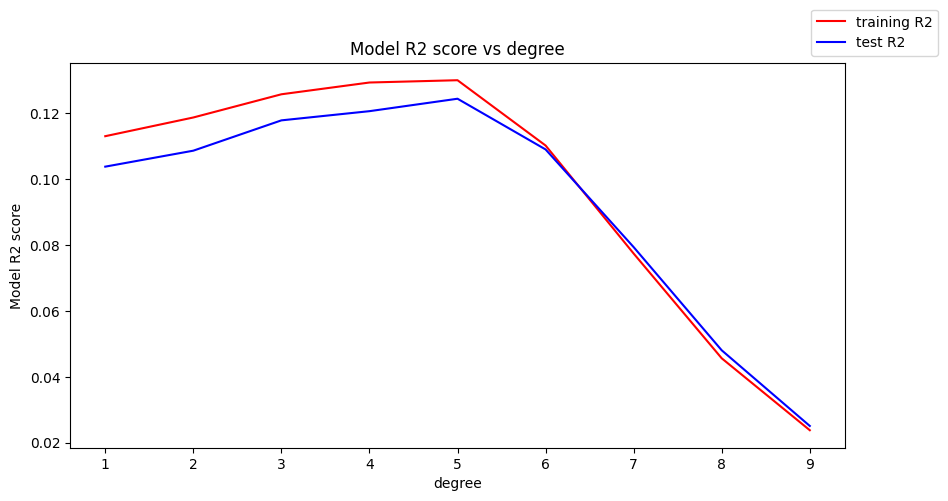

In [ ]:
#plot nilai training dan testing terhadap nilai k
plt.figure(figsize=(10,5))
plt.title('Model R2 score vs degree')
plt.xlabel('degree')
plt.ylabel('Model R2 score')
plt.plot(degree, train_R2, color = 'r', label = "training R2")
plt.plot(degree, test_R2, color = 'b', label = 'test R2')
plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)

In [ ]:
test_R2.index(max(test_R2))

4

In [ ]:
#membuat data frame
data = [
    [train_R2[0], test_R2[0]],
    [train_R2[1], test_R2[1]],
    [train_R2[2], test_R2[2]]
]
columns = ['Train_R2', 'Test_R2']
index = ['Linear', 'non-linear degree=2', 'non-linear degree=3']

R = pd.DataFrame(data, columns=columns, index=index)
R

,Train_R2,Test_R2
Linear,0.113076,0.103825
non-linear degree=2,0.118761,0.108676
non-linear degree=3,0.125809,0.117886


In [ ]:
#model akhir dan pengujian dengan derajat 3
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train)

poly_reg.fit(x_poly, y_train)

# fitting data
model = LinearRegression()
model.fit(x_poly, y_train)

#prediksi
pred_train = model.predict(x_poly)
x_poly_test = poly_reg.fit_transform(x_test)
pred_test = model.predict(x_poly_test)

# r2
train_R2_PR3 = r2_score(y_train, pred_train)
test_R2_PR3 = r2_score(y_test, pred_test)

print('train R2:',train_R2_PR3)
print('test R2:',test_R2_PR3)

train R2: 0.12580866809711444
test R2: 0.11788554962130149


In [ ]:
#pengujian
x_poly_test =poly_reg.fit_transform(test[['Regressor']])
y_test = model.predict(x_poly_test)

Text(0.5, 1.0, 'simple non linear regression analysis with degree-3')

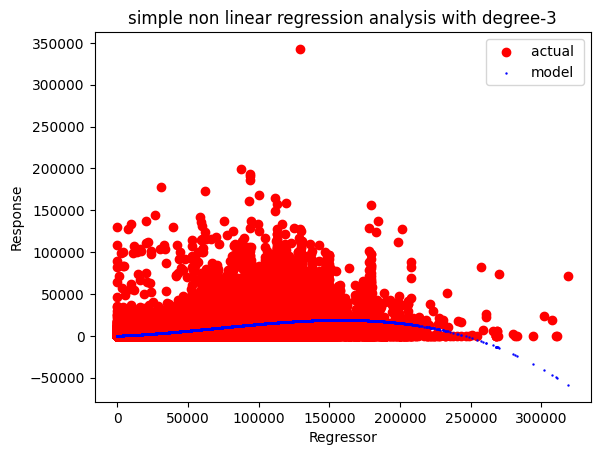

In [ ]:
#plot data pengujian
plt.scatter(test[['Regressor']], test[['Response']], color="red", label='actual ')
plt.scatter(test[['Regressor']], y_test, color="blue",s=0.5, label='model')
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.legend()
plt.title("simple non linear regression analysis with degree-3")

In [ ]:
#mencari intercept model
intercept = model.intercept_
print("Intercept:", intercept)

Intercept: [243.24543321]


In [ ]:
#mencari koefisien regresi
coef = model.coef_
print("Koefisien regresi:", coef)

Koefisien regresi: [[ 0.00000000e+00  6.09182947e-02  1.49356432e-06 -7.09677456e-12]]


In [ ]:
#membuat dataframe data regressor test polinomial
df_x_poly_test = pd.DataFrame(x_poly_test)
df_x_poly_test.head()

,0,1,2,3
0,1.0,129150.01,1.667973e+10,2.154187e+15
1,1.0,318835.49,1.016561e+11,3.241156e+16
2,1.0,257340.00,6.622388e+10,1.704205e+16
3,1.0,307450.04,9.452553e+10,2.906188e+16
4,1.0,302068.00,9.124508e+10,2.756222e+16


In [ ]:
#mengganti nama kolom pada dataframe data regressor test polinomial
df_x_poly_test_fix = df_x_poly_test.rename(columns = {0: "Derajat 0", 1: "Derajat 1", 2:"Derajat 2", 3:"Derajat 3"})
df_x_poly_test_fix.head()

,Derajat 0,Derajat 1,Derajat 2,Derajat 3
0,1.0,129150.01,1.667973e+10,2.154187e+15
1,1.0,318835.49,1.016561e+11,3.241156e+16
2,1.0,257340.00,6.622388e+10,1.704205e+16
3,1.0,307450.04,9.452553e+10,2.906188e+16
4,1.0,302068.00,9.124508e+10,2.756222e+16


In [ ]:
#membuat dataframe data respon test polinomial
df_y_test = pd.DataFrame(y_test)
df_y_test.head()

,0
0,17735.308948
1,-58521.515895
2,-6114.025025
3,-46093.057811
4,-40677.742455


In [ ]:
#mengganti nama kolom pada dataframe data respon test polinomial
df_y_test_fix = df_y_test.rename(columns = {0: "Respon"})
df_y_test_fix.head()

,Respon
0,17735.308948
1,-58521.515895
2,-6114.025025
3,-46093.057811
4,-40677.742455


In [ ]:
#melihat hasil regresinya
result = pd.concat([df_x_poly_test_fix, df_y_test_fix], axis = 1)
result.head()

,Derajat 0,Derajat 1,Derajat 2,Derajat 3,Respon
0,1.0,129150.01,1.667973e+10,2.154187e+15,17735.308948
1,1.0,318835.49,1.016561e+11,3.241156e+16,-58521.515895
2,1.0,257340.00,6.622388e+10,1.704205e+16,-6114.025025
3,1.0,307450.04,9.452553e+10,2.906188e+16,-46093.057811
4,1.0,302068.00,9.124508e+10,2.756222e+16,-40677.742455


In [ ]:
result.tail()

,Derajat 0,Derajat 1,Derajat 2,Derajat 3,Respon
38114,1.0,0.0,0.0,0.0,243.245433
38115,1.0,0.0,0.0,0.0,243.245433
38116,1.0,0.0,0.0,0.0,243.245433
38117,1.0,0.0,0.0,0.0,243.245433
38118,1.0,0.0,0.0,0.0,243.245433


#**KESIMPULAN**


Pada pemodelan machine learning di atas dataset yang digunakan berupa data salaries yang diambil melalui database yang tersedia di kaggle. Terdapat banyak atribut yang tersedia pada data tersebut, diantaranya Id, EmployeeName, JobTitle, BasePay, OvertimePay,	OtherPay,	Benefits,	TotalPay,	TotalPayBenefits,	Year,	Notes, Agency dan Status. Pada kasus ini, akan dilakukan pemodelan regression analysis untuk melihat apakah overtime pay dan other pay ikut meningkat ketika base pay nya meningkat. Data overtime pay dan other pay sebagai data respon, sedangkan data base pay sebagai variabel regressor. Untuk beberapa atribut yang tidak terpakai, akan dilakukan dropping.

Dalam pemodelan data dibagi dulu menjadi 2, data training dan testing. Data training adalah data yang digunakan untuk pelatihan machine learning, sedangkan data testing adalah data yang digunakan untuk mengukur seberapa bagus performansi model yang digunakan. Pada kasus ini data tahun 2014 dijadikan sebagai data testing, sedangkan data selain tahun 2014 dijadikan sebagai data training.

Sebelum melakukan pemodelan, dilakukan eksplorasi data untuk memahami dataset yang akan digunakan. Dalam hal ini akan dilakukan penentuan matrik korelasi antar atribut untuk mengukur sejauh mana dua variabel berkaitan satu sama lain dalam hubungan linear. Nilai korelasi yang dihasilkan diantaranya 0,024; 0,058 dan 0,33. Nilai korelasi 0,024 dan 0,058 mengartikan bahwa hubungan lemah atau hampir tidak ada hubungan linear yang signifikan antar dua variabel tersebut. Hal ini dikarenakan kedua nilai korelasi tersebut merupakan nilai korelasi antar variabel regressor/bebas, yang mana sebelum pemodelan menggunakan analisis regresi harus memenuhi uji asumsi non multikolinearitas atau tidak ada pengaruh antar variabel bebas. Sedangkan nilai korelasi 0,33 atau setara dengan 33% mengartikan bahwa nilai tersebut menunjukkan adanya hubungan positif antara dua variabel, yaitu antar variabel regressor dengan respons. Yang berarti bahwa ketika nilai satu variabel meningkat, nilai variabel lainnya juga cenderung meningkat. Pada kasus ini, nilai korelasi 0,33 dihasilkan oleh korelasi antara regressor dengan respon. Hal ini sesuai dengan tujuan adanya pemodelan, dimana untuk melihat apakah variabel respon ikut meningkat ketika regressornya meningkat.

Kemudian akan dilakukan pembangunan model. Model yang akan dibentuk antara lain, analisis regresi linear sederhana, analisis regresi non-linear dengan derajat bebas 2 serta analisis regresi non-linear sederhana dengan derajat bebas 3. Ketiga model tersebut dilihat nilai R-squared nya untuk mengukur seberapa baik model yang akan dibangun. Semakin tinggi skor R-squared nya, semakin baik model dapat menjelaskan datanya. Dalam kasus ini model terbaik jatuh pada model regresi non-linear derajat bebas 3 dengan skor R-squared pada data training sebesar 0.12375085466564639 (untuk mengukur seberapa baik model sesuai dengan data pelatihan) dan skor R2 pada data testing sebesar 0.11788554962130149 (untuk mengukur seberapa baik model dapat digunakan pada data yang belum pernah digunakan). Dimana model regresi non-linear yang dibentuk yakni y = 243.24543321 + 6.09182947e-02(X) + 1.49356432e-06(X^2) - 7.09677456e-12(X^3). Persamaan model ini akan digunakan untuk menguji data testing pada tahun 2014.

